<a href="https://colab.research.google.com/github/aeksei/PY200_Spring_2021/blob/master/lesson_4/lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На прошлом занятии мы затронули три ключевых момента ООП:
- Инкапсуляция
- Наследование 
- Полиморфизм

In [ ]:
class A:
    # def print_A(self):
    #     print(f"Вызван метод print_A класса '{type(self).__name__}'")
    ...


class B(A):
    def print_A(self):
        print(f"Вызван метод print_A класса {type(self).__name__}!!!")

class C(A):
    ...


In [ ]:
a = A()
a.print_A()

AttributeError: ignored

In [ ]:
b = B()
b.print_A()

Вызван метод print_A класса B!!!


In [ ]:
c = C()
c.print_A()

Вызван метод print_A класса 'C'


In [ ]:
def func(arg):
    if isinstance(arg, int):
        ...
    elif isinstance(arg, str):
        ...

In [ ]:
def func(arg: int):
    if isinstance(arg, int):
        ...

def func(arg: str):
    if isinstance(arg, str):
        ...

Сегодня будем говорить про итераторы и наследование

# Объектно-ориентированное программирование (ООП) на языке Python. Итераторы

## Итераторы

Вы знаете, как внутри устроены строки? А списки? А множества?

Чтобы пройтись по всем значениям этих последовательностей (пройтись - значит итерироваться), нам достаточно знать функцию, которая возвращает следующее значение, и нам не важно как устроена та или иная последовательность.

**Итерируемые объекты** – это любой объект, от которого встроенная функция `iter()` может получить итератор.

**Итератор** – это объект, который возвращает свои элементы по одному за раз при обращении к нему встроенной функцией `next()`

Для работы с итераторами в языке есть 2 встроенные функции:
- `iter(some_object)` – вызывает магический метод **`__iter__()`** и получает итератор итерируемого объекта 
- `next(some_iterator)` – вызывает магический метод **`__next__()`** и получает следующий элемент последовательности 

От int нельзя получить итератор

In [ ]:
iter(5)  # TypeError: 'int' object is not iterable

TypeError: ignored

В качестве примера возьмем строку и получим от неё итератор

In [ ]:
str_ = "my tst"  # итерируемый объект
str_iter = iter(str_)  # итератор

print(type(str_))  # <class 'str'>
print(type(str_iter))  # <class 'str_iterator'>

<class 'str'>
<class 'str_iterator'>


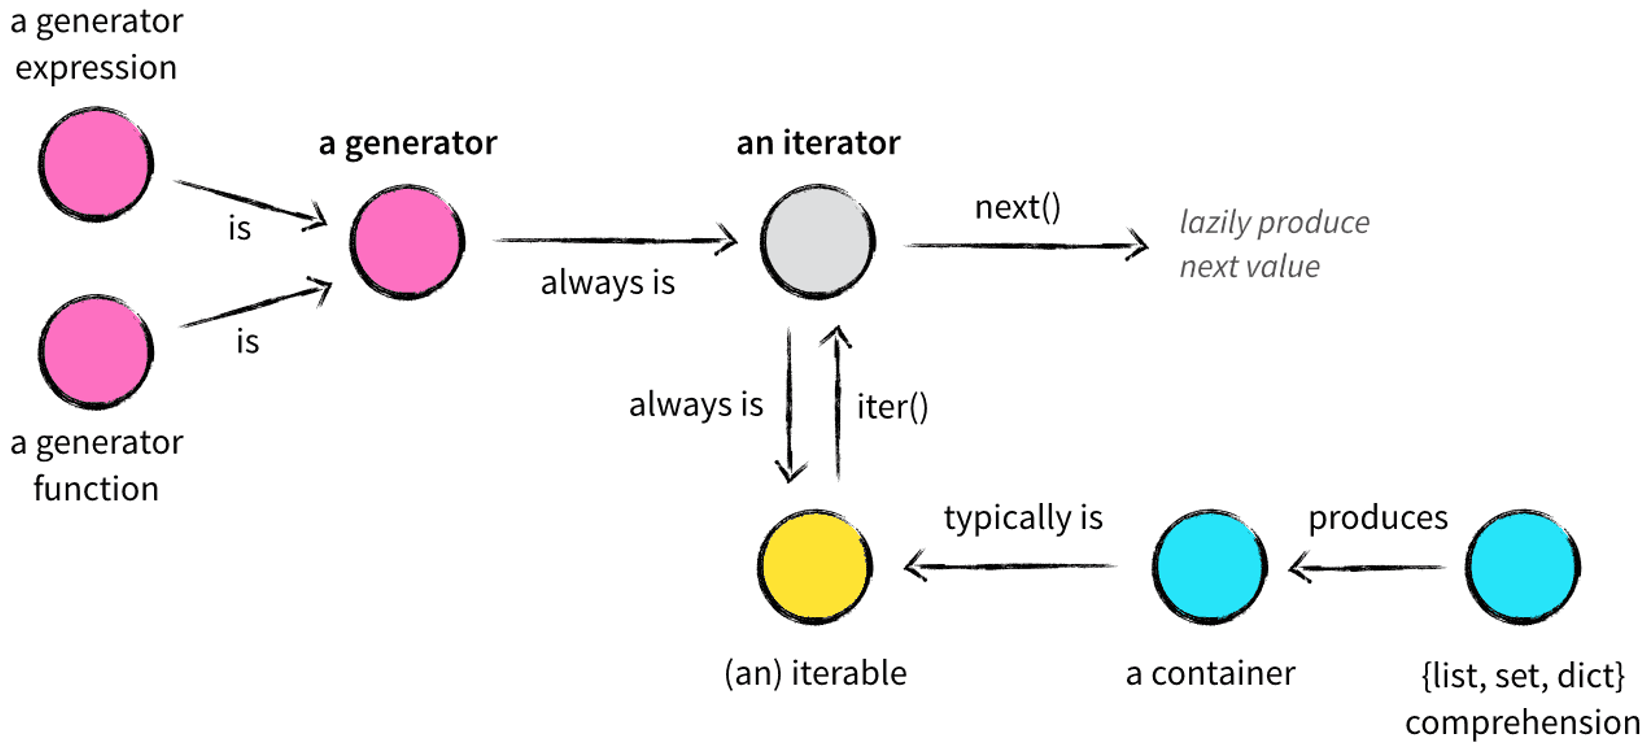

Python сначала пытается проверить метод `__iter__`, если не находит пытается воспользоваться `__getitem__`.

- `__getitem__` работают только для `int` ключей
- `__iter__` - сослаться на какой-то другой итератор, как это делает list
- `__next__` - самому описать логику возвращения следующего элемента

### Итерируемый объект

Словарь итерируется по ключам

Хотим свой словарь, который итерируется по значениям. Как сделать заготовку похожую на словарь и добавить к ней своё видение?

Наследование!))


```python
class MyDict(dict):
    def __init__(self, dict_):
        super().__init__(dict_)
```

Полная копия словаря, которая ничем не отличается от встроенного словаря. Только названием класса

In [ ]:
dict_ = {i: i ** 2 for i in range(10)}
for key in dict_:
    print(key)

0
1
2
3
4
5
6
7
8
9


In [ ]:
class MyDict(dict):
    def __iter__(self): # -> iterator
        return iter(self.values())

In [ ]:
dict_without_init = MyDict(dict_)

In [ ]:
for item in dict_without_init:
    print(item)


0
1
4
9
16
25
36
49
64
81


In [ ]:
print(type(dict_without_init.values()))

<class 'dict_values'>


In [ ]:
print(type(iter(dict_without_init.values())))

<class 'dict_valueiterator'>


In [ ]:
dict_without_init.values()

dict_values([0, 1, 4, 9, 16, 25, 36, 49, 64, 81])

In [ ]:
iter(dict(dict_))

В данном случае мы не риализуем логику обхода элементов, мы возвращаем итератор.

Давайте попробуем реализовать итератор, тот объект у которого определен метод `__next__`, а значит и логика обхода.

###  Итератор

Файл по умолчанию итерируется по строкам. Хочу такой итератор файла, который будет считывать и возвращать по n символов.

`f.read(n)` – операция, читающая с текущего места **n** символов и возвращающая прочитанную информацию.

Что будет если дойти до конца файла с помощью функции read?


In [ ]:
FILENAME = 'test.txt'

with open(FILENAME) as f:
    for i in range(15):
        print(repr(f.read(1)))

'0'
'1'
'2'
'3'
'4'
'\n'
'5'
'6'
'7'
'8'
'9'
''
''
''
''


In [ ]:
FILENAME = 'test.txt'


class MyFile:
    def __init__(self, filename, buf_size=1):
        self.__filename = filename
        self.__buf_size = buf_size

    def __iter__(self): # -> iterator
        # открыть файл
        print("Вызван итератор")
        self.__file = open(self.__filename)
        return self


    def __next__(self):
        print("Вызван next")
        buf = self.__file.read(self.__buf_size)
        if buf:
            return buf
        else:
            raise StopIteration() 


In [ ]:
class MyDict(dict):
    def __iter__(self): # -> iterator
        return iter(self.values())

In [ ]:
my_file = MyFile(FILENAME)

In [ ]:
iter(my_file) is my_file

Вызван итератор


True

In [ ]:
i = 0
for char in my_file:
    print(char)
    i += 1
    if i == 20:
        break

Вызван итератор
Вызван next
0
Вызван next
1
Вызван next
2
Вызван next
3
Вызван next
4
Вызван next


Вызван next
5
Вызван next
6
Вызван next
7
Вызван next
8
Вызван next
9
Вызван next


In [ ]:
i = 0
for char in my_file:
    print(char)
    i += 1
    if i == 5:
        break

Вызван итератор
Вызван next
0
Вызван next
1
Вызван next
2
Вызван next
3
Вызван next
4


Вообще переопределять функцию `__next__` довольно не простое занятие, которое в основном заточено на использование внутреннего представления объекта.

In [ ]:
class Count:
    def __init__(self, start, step):
        self.__start = start
        self.__step = step

    def __iter__(self):
        """Инициализируем начальные условия"""
        self.__current_num = ...
        ...

    def __next__(self):
        ...

In [ ]:
for num in Count(0, 1):
    print(num)
    if num > 10:
        break

Выглядит сложно и запутанно((( Вот бы функция умела внутри себя сохранять свой контекст, и при необходимости возвращать его... 

Ничего не напоминает?

In [ ]:
# Функция-генератор

### Итерируемый LinkedList

In [ ]:
# PyCharm

# Объектно-ориентированное программирование (ООП) на языке Python. Время жизни объекта

Время жизни объекта - это время с момента создания объекта до его уничтожения.

Объект начинает существовать после успешного завершения `__init__`.


```python
class Glass:
    def __init__(self, capacity_volume):
        if not isinstance(capacity_volume, (int, float)):
            raise TypeError('Capacity volume must be int or float')
        if capacity_volume < 0:
            raise ValueError('Capacity volume must be more then zero')
        self.capacity_volume = capacity_volume```



In [ ]:
glass = Glass(10) # OK
glass = Glass() # TypeError: __init__() missing 1 required positional argument: 'capacity_volume'
glass = Glass('Capacity') # TypeError: Capacity volume must be int or float
glass = Glass(-50) # ValueError: Capacity volume must be more than zero

Только в первом случае объект glass стал существовать.

В остальных случаях объект не сконструирован (такими объектом пользоваться нельзя).

Неверное проектирование __init__

```python
class Glass:
    def __init__(self, capacity_volume):
        if not isinstance(capacity_volume, (int, float)):
            return
        if capacity_volume < 0:
            return
        self.capacity_volume = capacity_volume
```



- В результате вызова __init__ объект может быть создан или не создан.
- Пользователь Вашего класса определяет успешность создания объекта
отсутствием исключений.
- Если при создании объекта было выброшено исключение, то объектом пользоваться нельзя.
- Если при создании объекта НЕ было выброшено исключение, то объектом пользоваться
можно.

## Уничтожение (деструкция) объекта

### Алгоритмы сборки мусора

Стандартный интерпретатор питона (CPython) использует сразу два алгоритма, подсчет ссылок и generational garbage collector (далее GC), более известный как стандартный модуль gc из Python.

Алгоритм подсчета ссылок очень простой и эффективный, но у него есть один большой недостаток. Он не умеет определять циклические ссылки. Именно из-за этого, в питоне существует дополнительный сборщик, именуемый поколенческий GC, который следит за объектами с потенциальными циклическими ссылками.

В Python, алгоритм подсчета ссылок является фундаментальным и не может отключен, тогда как GC опционален и может быть отключен.

Деструкция и уничтожение объекта в Python не регламентирована для разработчика,
т.е. разработчик не может вручную удалить объект.

Разработчик может лишь удалить ссылку на объект, но уничтожение объекта будет выполнено
сборщиком мусора.

### Алгоритм подсчета ссылок


Алгоритм подсчета ссылок это одна из самых простых техник для сборки мусора. Объекты удаляются как только на них больше нет ссылок.

В Python, переменные не хранят значения, а выступают в роли ссылок на объекты. То есть когда вы присваивайте значение новой переменной, то сначала создается объект с этим значением, а уже потом переменная начинает ссылаться на него. На один объект может ссылаться множество переменных.


Примеры, когда количество ссылок увеличивается:

- оператор присваивания
- передача аргументов
- конструция вида foo = bar (foo начинается ссылаться на тот же объект, что и bar)
- вставка нового объекта в лист 
(увеличивается количество ссылок для объекта)

`sys.getrefcount` функция для получения количества ссылкок на объект.

In [ ]:
import sys

In [ ]:
a = 10345

In [ ]:
sys.getrefcount(a)

2

In [ ]:
b = a

In [ ]:
sys.getrefcount(a)

3

In [ ]:
sys.getrefcount(b)

3

In [ ]:
del a

In [ ]:
sys.getrefcount(b)

2

Почему 2 ссылки?? 
Переменная объявлена один раз...

[Не забываем про документацию](https://docs.python.org/3/library/sys.html#sys.getrefcount)

In [ ]:
for i in range(260):
    print(i, sys.getrefcount(i))

0 9742
1 8294
2 2508
3 1304
4 1043
5 662
6 552
7 363
8 571
9 339
10 435
11 261
12 252
13 125
14 118
15 140
16 287
17 123
18 96
19 110
20 475
21 122
22 128
23 122
24 110
25 83
26 69
27 70
28 73
29 75
30 114
31 90
32 197
33 61
34 47
35 75
36 40
37 62
38 114
39 118
40 182
41 37
42 34
43 38
44 37
45 40
46 40
47 40
48 70
49 57
50 88
51 49
52 38
53 165
54 89
55 36
56 38
57 49
58 32
59 38
60 68
61 35
62 26
63 35
64 156
65 45
66 36
67 33
68 36
69 25
70 38
71 35
72 70
73 35
74 29
75 37
76 44
77 31
78 39
79 36
80 74
81 32
82 27
83 21
84 21
85 24
86 22
87 20
88 35
89 28
90 78
91 30
92 29
93 29
94 20
95 146
96 28
97 44
98 34
99 26
100 175
101 45
102 33
103 34
104 39
105 39
106 31
107 33
108 33
109 20
110 35
111 38
112 33
113 35
114 35
115 36
116 23
117 41
118 41
119 29
120 30
121 22
122 37
123 22
124 23
125 27
126 24
127 51
128 148
129 23
130 24
131 17
132 19
133 13
134 10
135 122
136 12
137 13
138 16
139 13
140 14
141 12
142 12
143 13
144 13
145 11
146 11
147 12
148 15
149 11
150 9
151 11
152 11


А теперь реализуем метод для очистки LinkedList

### Циклические ссылки

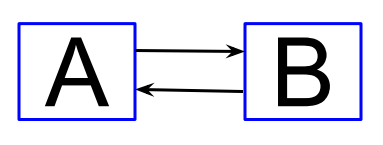

- Два объекта A и B ссылаются друг на друга;
- Счётчик ссылок на каждый из объектов больше нуля;
- Объекты могут быть уничтожены, если запустится циклический сборщик мусора.

In [ ]:
# DoubleLinkedNode

Циклический сборщик мусора (Cyclic garbage collector, GC) - это сборщик мусора, который
1. обнаруживает неиспользуемые
циклически связанные объекты и
2. уменьшает их счётчики ссылок до
нуля.

Со стороны прикладного программиста
невозможно определить когда сборщик
мусора удалит эти объекты.

In [ ]:
import gc
g.collect()

In [ ]:
from weakref import ref

class A:
    def __init__(self, a):
        self.a = a
        
a = A(5)
weak_a = ref(a)

print(weak_a().a)

5
